# Import Libraries

In [1]:
!pip install pandas
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load csv file

In [35]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [36]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Describe

In [37]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [39]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Split X and Y

In [40]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [41]:
print("***** Independent Values(x) *****")

print("***** Its Shape *****")
print(x.shape)

x.head()

***** Independent Values(x) *****
***** Its Shape *****
(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [42]:
print("***** Dependent Values(y) *****")

print("***** Its Shape *****")
print(y.shape)

y.head()


***** Dependent Values(y) *****
***** Its Shape *****
(299,)


0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split into Train and Test

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [44]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Fitting

In [45]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [46]:

# multipleLogisticRegressers=LogisticRegression(solver='lbfgs', max_iter=200)

# """Error found: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# Increase the number of iterations (max_iter) or scale the data as shown in:
#     https://scikit-learn.org/stable/modules/preprocessing.html
# Please also refer to the documentation for alternative solver options:
#     https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#   n_iter_i = _check_optimize_result( """
# #Source for solving: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
# #My Guess: Data seems to be unpredictable. So it was difficult for our model to converge and give appropriate model for fitting.

# model=multipleLogisticRegressers.fit(x_train,y_train)


In [47]:
print("***** Model Coefficients *****")
print(model.coef_)
print("*****Bias*****")
print(model.intercept_)

***** Model Coefficients *****
[[ 0.50836517  0.07282748  0.26307508 -0.09601796 -0.88416051 -0.01918663
  -0.10315375  0.51817838 -0.1592498  -0.09387563 -0.10257196 -1.414383  ]]
*****Bias*****
[-1.14685628]


# Predict on test data

In [48]:
#Testing on test datas
y_pred=model.predict(x_test_scaled)

print(y_pred)

[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1]


# Evaluation Metrices

In [49]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [50]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.8666666666666667
Recall-Score : 0.8
Precision-Score : 0.7058823529411765
F1-Score : 0.7500000000000001


# Classification Report

In [ ]:
print(classification_report(y_pred,y_test))

# Confusion Metrics

In [ ]:
!pip install seaborn


In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

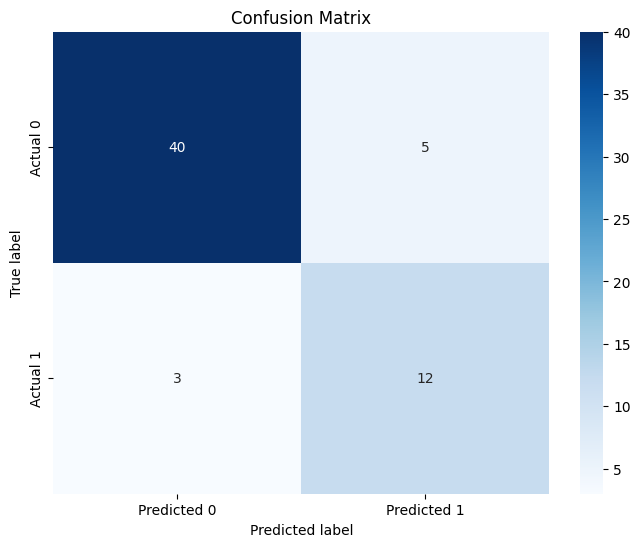

In [54]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Assignment

<li> Try predicting on custom data </li>

In [55]:
x_test.iloc[1]

age                             42.0
anaemia                          0.0
creatinine_phosphokinase       102.0
diabetes                         1.0
ejection_fraction               40.0
high_blood_pressure              0.0
platelets                   237000.0
serum_creatinine                 1.2
serum_sodium                   140.0
sex                              1.0
smoking                          0.0
time                            74.0
Name: 77, dtype: float64

In [56]:
custom_data=pd.DataFrame({
'age': [100],
'anaemia': [10],
'creatinine_phosphokinase': [13],
'diabetes': [12],
'ejection_fraction': [35],
'high_blood_pressure': [40],
'platelets': [4070],
'serum_creatinine': [3.0],
'serum_sodium': [145],
'sex': [11],
'smoking': [10],
'time': [29]
})


In [57]:
custom_data_scaled = scaler.transform(custom_data)

In [58]:
custom_true= [0]

In [59]:
#Testing on test datas
custom_pred= model.predict(custom_data_scaled)

print(custom_pred)



[0]


In [61]:
custom_prob_scores = model.predict_proba(custom_data_scaled)
print("Probability scores:", custom_prob_scores)

Probability scores: [[0.96978121 0.03021879]]


In [62]:
print("Model's acuracy :",accuracy_score(custom_true,custom_pred))
print("Recall-Score :",recall_score(custom_true,custom_pred, zero_division=1))
print("Precision-Score :",precision_score(custom_true,custom_pred, zero_division=1))
print("F1-Score :",f1_score(custom_true,custom_pred, zero_division=1))

Model's acuracy : 1.0
Recall-Score : 1.0
Precision-Score : 1.0
F1-Score : 1.0


In [63]:
print(classification_report(custom_true,custom_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



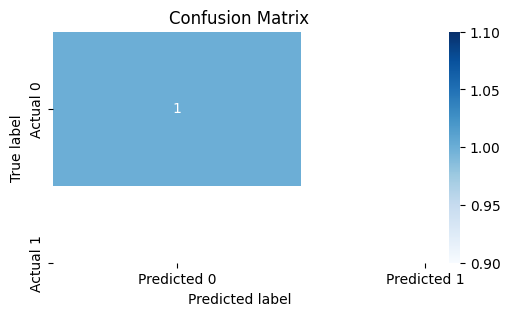

In [64]:
# Compute confusion matrix
cm = confusion_matrix(custom_true,custom_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()